# Week 1

## Overview

As explained in the [*Before week 1* notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true), each week of this class is an IPython notebook like this one. **_In order to follow the class, you simply start reading from the top_**, following the instructions.

**Hint**: And you can ask me - or any of the friendly Teaching Assistants - for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* As the zero'th item. Make sure that you're on top of Python. If you feel you need to refresh. **PLEASE GO TO THE** [Python refresher Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/PythonBootcamp.ipynb?flush_cache=true) and work through it before proceeding.
* And, if you haven't already, also watch the video in the ["How we do things" Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true). Understanding what's going on, will save you a lot of pain and suffering later on in the course.

Ok. And now for the actual lecture

* First, we talk a bit about APIs and how they work.
* Next we'll dip our toes in the waters of Network Science, with a bit of lecturing and reading.
* Thirdly, and finally, we'll be getting our hands dirty getting to know the awesome Network Analysis package `NetworkX`.

## Part 1: What is an API?

As a little check that you're on top of Python, let's get started with a quick overview of APIs. And don't worry, the work you do here will be relevant later, I promise.
> 
> **_Video lecture_**: Click below to watch it on YouTube.
> 
**NOTE**: That this video is made for Python 2. There are a few things that won't work in Python 3. To help smooth things over until I update the video, **[here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is an Python3 version of the notebook used in the video to help you out with the changes.

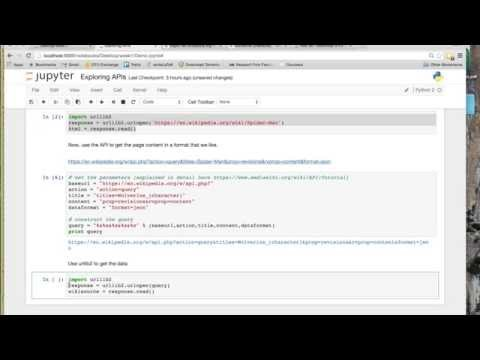

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("9l5zOfh0CRo", width=800, height=450)

It's time for you to get to work. Take a look at the two texts below - just to get a sense of a more technical description of how APIs work.

Again, this is a Python 2 video, so small changes may apply. This video will be updated soon. Hint: **[Here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is a Python3 version of the notebook used in the video that you can work from.


> _Reading_ (just skim): [Wikipedia page on APIs](https://en.wikipedia.org/wiki/Web_API)  
> _Reading_ (just skim): [Wikipedia page on REST for web services](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_web_services)
> 

> *Exercise*: 
> * Explain in your own words: What is the the difference between the html page and the wiki-source?

HTML page: the browser-ready, rendered version (with CSS/JS). It’s what you see at https://en.wikipedia.org/wiki/Rembrandt. It includes navigation, infobox markup turned into tables, links, etc. Great for humans, messy to parse.

Wiki-source (wikitext): the raw article source stored by MediaWiki (templates, links, categories, etc.). You fetch it via the MediaWiki API, e.g., as JSON containing the page’s wikitext string. Great for programmatic processing or building your own renderer.
> * What are the various parameters you can set for a query of the wikipedia api?

Typical endpoint: https://en.wikipedia.org/w/api.php
Key params (most important first):

action=query – use the query module.

titles=... – page title(s), pipe-separated for multiples.

prop=revisions – request revision content.

rvprop=content – include the revision text itself.

rvslots=main – (modern format) choose the “main” content slot.

format=json – machine-readable output.

formatversion=2 – nicer JSON shape (optional but handy).

redirects=1 – follow redirects automatically (optional).
Good practice:

User-Agent header: Wikipedia will often reject requests without a descriptive UA.

You can also set origin=* (for browser JS/CORS; not needed for Python).

> * Write your own little `notebook` to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages.

<div class="alert alert-block alert-info">
You might feel tempted to use an LLM to answer the questions above. Don't! The goal of taking the class is to get smarter, and you won't get smarter if someone else does the work for you. So think! Write down your own thoughts. Then when you're done, you can use and LLM to make the answers better.
</div>

In [ ]:
import json
import os
import pathlib
import urllib.parse
import urllib.request

API_BASE = "https://en.wikipedia.org/w/api.php"
USER_AGENT = "MyCourseBot/1.0"

def get_url(url):
    req = urllib.request.Request(url, headers={"User-Agent": USER_AGENT})
    with urllib.request.urlopen(req) as resp:
        return resp.read()

def build_api_url(params: dict) -> str:
    return API_BASE + "?" + urllib.parse.urlencode(params)

def fetch_wikitext(title: str) -> str:
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "main",
        "titles": title,
        "format": "json",
        "formatversion": "2",
        "redirects": "1",
    }
    url = build_api_url(params)
    data = json.loads(get_url(url))
    pages = data.get("query", {}).get("pages", [])
    if not pages:
        raise ValueError(f"No pages returned for '{title}'")
    page = pages[0]
    if "missing" in page:
        raise ValueError(f"Page '{title}' is missing")
    revs = page.get("revisions", [])
    if not revs:
        raise ValueError(f"No revisions returned for '{title}'")
    return revs[0]["slots"]["main"]["content"]

def save_text(title: str, text: str, out_dir="wikitext"):
    pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
    safe = title.replace("/", "_")
    path = os.path.join(out_dir, f"{safe}.wikitext.txt")
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)
    return path

def fetch_html(title: str) -> str:
    page_url = "https://en.wikipedia.org/wiki/" + urllib.parse.quote(title.replace(" ", "_"))
    return get_url(page_url).decode("utf-8", errors="replace")
titles = [
    "Rembrandt",
    "Ada Lovelace",
    "Spider-Man",
    "Copenhagen",
]

for t in titles:
    print(f"\n=== {t} ===")
    wikitext = fetch_wikitext(t)
    out = save_text(t, wikitext)
    print(f"Wikitext length: {len(wikitext):,} chars -> saved to {out}")

    html = fetch_html(t)
    print(f"Rendered HTML length: {len(html):,} chars (not saved)")



=== Rembrandt ===
Wikitext length: 112,902 chars -> saved to wikitext\Rembrandt.wikitext.txt
Rendered HTML length: 546,233 chars (not saved)

=== Ada Lovelace ===
Wikitext length: 95,196 chars -> saved to wikitext\Ada Lovelace.wikitext.txt
Rendered HTML length: 475,331 chars (not saved)

=== Spider-Man ===
Wikitext length: 186,775 chars -> saved to wikitext\Spider-Man.wikitext.txt
Rendered HTML length: 1,090,409 chars (not saved)

=== Copenhagen ===
Wikitext length: 233,224 chars -> saved to wikitext\Copenhagen.wikitext.txt
Rendered HTML length: 1,067,351 chars (not saved)


# Part 2: Basic description of networks

Now let's get to some some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Start by watching the "History of Networks" below


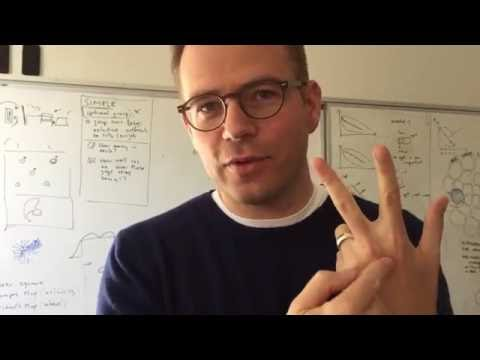

In [2]:
YouTubeVideo("qjM9yMarl70", width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://networksciencebook.com). If you like paper books, the DTU Bookstore has good deals, I am told.
> 
> * Read chapter 1\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in an IPython notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.

Facebook social network- Nodes: Individual users, Links: Friendships (mutual connections between users)

World Wide Web (WWW)- Nodes: Webpages, Links: Hyperlinks pointing from one page to another

Airport transportation network- Nodes: Airports, Links: Direct flights between airports

> * Tell us of the network you are personally most interested in (a fourth one). Address the following questions:

I have picked the Human brain 

>   * What are its nodes and links? 

Nodes: Neurons

Links: Synapses (electrochemical connections between neurons)
>   * How large is it? 

The human brain has about 86 billion neurons, each with thousands of synapses, making it one of the largest and most complex known networks.
>   * Can be mapped out? 

Only partially. Projects like the Human Connectome Project attempt to map brain connectivity, but a full-scale mapping remains infeasible due to complexity.
>   * Does it evolve over time?

Yes. Neural networks evolve during learning, memory formation, and aging. Synaptic strengths change dynamically (neuroplasticity).
>   * Are there processes occurring ON the network? (information spreading, for example)

Yes, electrical signals and neurotransmitters transmit information across the network. Information spreading, memory recall, and decision-making all occur as processes on this network.
>   * Why do you care about it? 

Understanding the brain’s network is central to neuroscience, artificial intelligence, and medicine. Insights could lead to breakthroughs in treating neurological disorders and improving machine learning.
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.

The biggest impact could be in epidemiology and health networks. By modeling human contact networks and disease-spreading dynamics, network science can help predict and contain pandemics more effectively (as seen with COVID-19). Improved models of social contact networks, transportation systems, and information diffusion will allow policymakers to design targeted interventions, optimize vaccination strategies, and reduce the societal cost of global health crises.

This aligns with Barabási’s idea that networks reveal hidden patterns behind spreading processes, making them crucial for tackling large-scale, interconnected challenges.

<div class="alert alert-block alert-info">
Once again, you might feel tempted to use an LLM to answer the questions above. Don't do it! 
    
The goal of taking the class is to get learn, and you won't learn a thing if a machine does the work for you. It's OK to first down your own thoughts. Then, when you're done, you can use and LLM to improve your answers.
</div>

# Part 3: The awesome `NetworkX` library

In case it wasn't clear by now, this class is about YOU analyzing networks. And it wouldn't be right to start the first lecture without playing a little bit with network analysis (there will be much more on this in the following lectures). So here goes...

`NetworkX` should already be installed as part of your _Anaconda_ Python distribution. But you don't know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the next exercise is about

> *Exercises*:
> 
> * Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). The goal of this exercise is to create your own Notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense. 

There will be much more on NetworkX next time.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# --- Create a simple graph ---
G = nx.Graph()  
G.add_node("A")
G.add_nodes_from(["B", "C", "D"])   # Add multiple nodes
G.add_edge("A", "B")
G.add_edges_from([("A", "C"), ("B", "D")])  # Add multiple edges

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'D')]


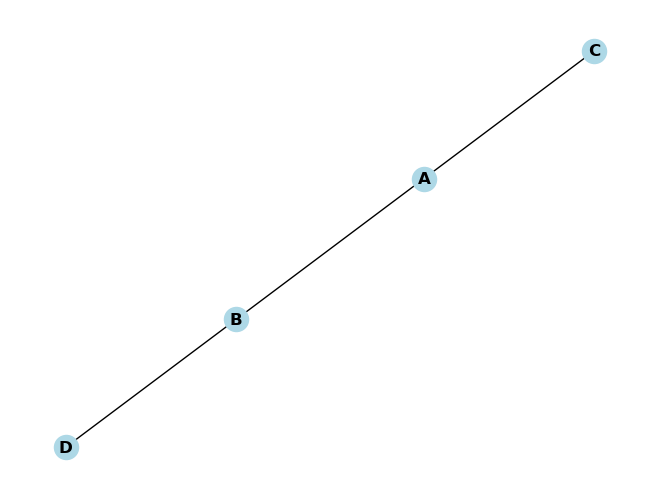

In [4]:
# --- Draw the graph ---
nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold")
plt.show()

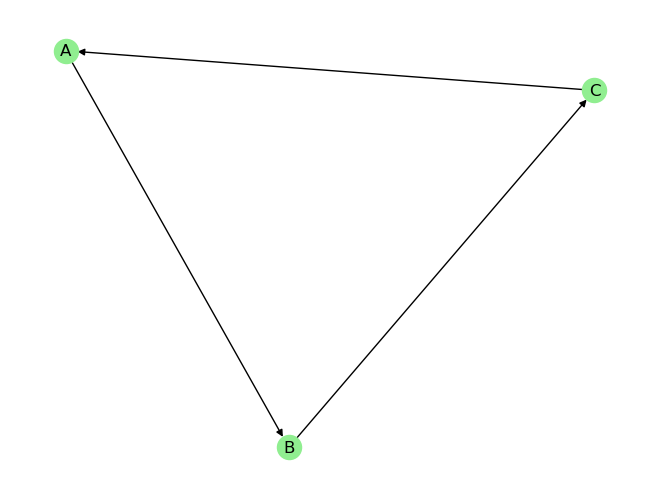

In [5]:
# --- Directed graph example ---
DG = nx.DiGraph()
DG.add_edges_from([("A", "B"), ("B", "C"), ("C", "A")])
nx.draw(DG, with_labels=True, node_color="lightgreen", arrows=True)
plt.show()

In [6]:
# --- Weighted graph example ---
WG = nx.Graph()
WG.add_edge("X", "Y", weight=5)
WG.add_edge("Y", "Z", weight=2)
print("Weighted edges:", WG.edges(data=True))

Weighted edges: [('X', 'Y', {'weight': 5}), ('Y', 'Z', {'weight': 2})]


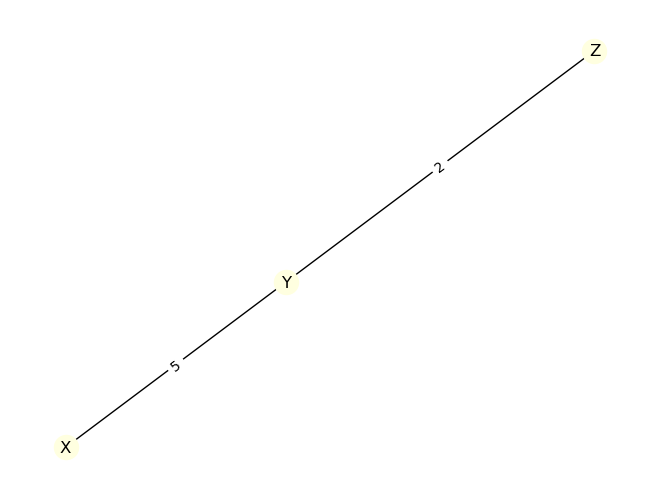

In [7]:

pos = nx.spring_layout(WG)
nx.draw(WG, pos, with_labels=True, node_color="lightyellow")
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)
plt.show()


In [8]:
# --- Basic analysis ---
print("Degree of each node:", dict(G.degree()))
print("Shortest path A->D:", nx.shortest_path(G, "A", "D"))
print("Clustering coefficient:", nx.clustering(G))

Degree of each node: {'A': 2, 'B': 2, 'C': 1, 'D': 1}
Shortest path A->D: ['A', 'B', 'D']
Clustering coefficient: {'A': 0, 'B': 0, 'C': 0, 'D': 0}


In [ ]:
# This just creates an empty graph wit no nodes or no edges. 
import networkx as nx
g=nx.Graph()

In [ ]:
# Adding one node at a time 
g.add_node(1)

In [9]:
# adding multiple nodes a list. 
g.add_nodes_from([2, 3])

In [10]:
# adding nodes along with node attributes 
g.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
# incorpo
H = nx.path_graph(10)
g.add_nodes_from(H)

In [13]:
print (g)

Graph with 10 nodes and 0 edges


In [14]:
g.add_node(H)


In [15]:
print (g)

Graph with 11 nodes and 0 edges


In [16]:
# adding edges
g.add_edge(1, 2)
e = (2, 3)
g.add_edge(*e)  # unpack edge tuple*

In [17]:
g.add_edges_from([(1, 2), (1, 3)])

In [18]:
g.add_edges_from(H.edges)

In [19]:
print(g)

Graph with 11 nodes and 10 edges


In [20]:
g.clear()

In [21]:
g.add_edges_from([(1, 2), (1, 3)])
g.add_node(1)
g.add_edge(1, 2)
g.add_node("spam")        # adds node "spam"
g.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
g.add_edge(3, 'm')

In [23]:
g.number_of_nodes()

8

In [24]:
g.number_of_edges()

3

In [25]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]